
# Projet 2

In [1]:
# import des modules usuels
import numpy as np
import pandas as pd

# options d'affichage
pd.set_option("display.min_rows", 16)

In [2]:
# chargement et traitement des données
geo = pd.read_csv("correspondance-code-insee-code-postal.csv",
                   sep=';',
                   usecols=range(11),
                   index_col="Code INSEE")
geo = geo.sort_index()
geo[['Latitude', 'Longitude']] = geo["geo_point_2d"].str.extract("(.*), (.*)").astype(float)
geo.head()

,Code Postal,Commune,Département,Région,Statut,Altitude Moyenne,Superficie,Population,geo_point_2d,geo_shape,Latitude,Longitude
Code INSEE,,,,,,,,,,,,
01001,01400,L'ABERGEMENT-CLEMENCIAT,AIN,RHONE-ALPES,Commune simple,242.0,1565.0,0.8,"46.1534255214, 4.92611354223","{""type"": ""Polygon"", ""coordinates"": [[[4.926273...",46.153426,4.926114
01002,01640,L'ABERGEMENT-DE-VAREY,AIN,RHONE-ALPES,Commune simple,483.0,912.0,0.2,"46.0091878776, 5.42801696363","{""type"": ""Polygon"", ""coordinates"": [[[5.430089...",46.009188,5.428017
01004,01500,AMBERIEU-EN-BUGEY,AIN,RHONE-ALPES,Chef-lieu canton,379.0,2448.0,13.4,"45.9608475114, 5.3729257777","{""type"": ""Polygon"", ""coordinates"": [[[5.386190...",45.960848,5.372926
01005,01330,AMBERIEUX-EN-DOMBES,AIN,RHONE-ALPES,Commune simple,290.0,1605.0,1.6,"45.9961799872, 4.91227250796","{""type"": ""Polygon"", ""coordinates"": [[[4.895580...",45.996180,4.912273
01006,01300,AMBLEON,AIN,RHONE-ALPES,Commune simple,589.0,602.0,0.1,"45.7494989044, 5.59432017366","{""type"": ""Polygon"", ""coordinates"": [[[5.614854...",45.749499,5.594320


**Projet maison n° 1**

- Ajoutez une colonne 'CP Ville' avec le Code postal + un espace + et le nom de la Ville.
- Ecrivez une fonction qui détermine la commune la plus proche d'un point à partir de sa latitude et sa longitude.
- Ajoutez une fonction de conversion pour pouvoir utiliser la première fonction avec un GPS (degrés, minutes, secondes).

In [3]:
geo['CP Ville'] = geo['Code Postal'] + ' ' + geo['Commune']
geo.head()

,Code Postal,Commune,Département,Région,Statut,Altitude Moyenne,Superficie,Population,geo_point_2d,geo_shape,Latitude,Longitude,CP Ville
Code INSEE,,,,,,,,,,,,,
01001,01400,L'ABERGEMENT-CLEMENCIAT,AIN,RHONE-ALPES,Commune simple,242.0,1565.0,0.8,"46.1534255214, 4.92611354223","{""type"": ""Polygon"", ""coordinates"": [[[4.926273...",46.153426,4.926114,01400 L'ABERGEMENT-CLEMENCIAT
01002,01640,L'ABERGEMENT-DE-VAREY,AIN,RHONE-ALPES,Commune simple,483.0,912.0,0.2,"46.0091878776, 5.42801696363","{""type"": ""Polygon"", ""coordinates"": [[[5.430089...",46.009188,5.428017,01640 L'ABERGEMENT-DE-VAREY
01004,01500,AMBERIEU-EN-BUGEY,AIN,RHONE-ALPES,Chef-lieu canton,379.0,2448.0,13.4,"45.9608475114, 5.3729257777","{""type"": ""Polygon"", ""coordinates"": [[[5.386190...",45.960848,5.372926,01500 AMBERIEU-EN-BUGEY
01005,01330,AMBERIEUX-EN-DOMBES,AIN,RHONE-ALPES,Commune simple,290.0,1605.0,1.6,"45.9961799872, 4.91227250796","{""type"": ""Polygon"", ""coordinates"": [[[4.895580...",45.996180,4.912273,01330 AMBERIEUX-EN-DOMBES
01006,01300,AMBLEON,AIN,RHONE-ALPES,Commune simple,589.0,602.0,0.1,"45.7494989044, 5.59432017366","{""type"": ""Polygon"", ""coordinates"": [[[5.614854...",45.749499,5.594320,01300 AMBLEON


In [4]:
import math #pour utiliser sqrt afin de calculer la distance entre deux points
# fonction recherche de ville
def ville(lat, long):
    return geo['Commune'][np.sqrt((geo["Latitude"] - lat)**2 + (geo["Longitude"] - long)**2).idxmin()]

In [5]:
# on applique la fonction à une coordonnée tirée au hasard
# init du random
np.random.seed(0)

a, b = 41.5, 51.1  # latitude min et max de la France métropolitaine
lat = (b - a) * np.random.random() + a
a, b = -5.1, 9.5  # longitude min et max de la France métropolitaine
long = (b - a) * np.random.random() + a

ville(lat, long)

'BOSJEAN'

In [6]:
# conversion degrés, minutes, secondes => décimal
def dms2dec(deg, mn, sec):
    return deg + mn / 60 + sec / 3600

In [7]:
# à partir de coordonnées GPS précises
ville(dms2dec(48, 42, 52), dms2dec(2, 14, 45))

'PALAISEAU'

**Projet maison n° 2**

La colonne "geo_shape" comporte des chaines de catactères au format JSON. Elles représentent les formes géométriques des communes qui sont soit des polygones soit composées de plusieurs polygones.

- Utiliser la librairie Python json pour parser la colonne "geo_shape".
- Donner le décompte des valeurs accédées avec la clé "type".
- Donner le décompte des longueurs des listes accédées avec la clé "coordinates".
- Quelle commune est la plus complexe géométriquement ?
- Quelle commune est la seconde la plus complexe géométriquement ?
- Quelles sont les villes qui sont de type "Polygon" mais dont la longueur des listes accédées avec la clé "coordinates" vaut 2 ?
- Pour ces villes vérifier que le premier polygone contient bien le second (enclave). NB : installer la librairie shapely, utiliser la classe Polygon de shapely.geometry. Sur Windows shapely peut nécessiter d'installer la dll "geos_c.dll" dans le répertoire "Library/bin" de votre environnement Python.

In [8]:
import json #demo json pour la ligne index 01001
y = geo.loc["01001", "geo_shape"]
print(y)
d = json.loads(y)
d

{"type": "Polygon", "coordinates": [[[4.92627342692396, 46.1200517234555], [4.92199538031264, 46.12069170563269], [4.921996260482057, 46.12663667307488], [4.90936269187648, 46.129164756530656], [4.916016986429157, 46.14461766984426], [4.903080786126749, 46.157977074275074], [4.904571300671208, 46.16096059498421], [4.910603091203733, 46.180432597608316], [4.914119126867876, 46.18271538441311], [4.932895432675545, 46.18304616431434], [4.938729478686701, 46.17383114520867], [4.933038591703602, 46.16429901579509], [4.958286230120842, 46.153246666893935], [4.943330383388636, 46.145964148557894], [4.939154593056283, 46.12938048470421], [4.931056072485923, 46.12087123131487], [4.92627342692396, 46.1200517234555]]]}


{'type': 'Polygon',
 'coordinates': [[[4.92627342692396, 46.1200517234555],
   [4.92199538031264, 46.12069170563269],
   [4.921996260482057, 46.12663667307488],
   [4.90936269187648, 46.129164756530656],
   [4.916016986429157, 46.14461766984426],
   [4.903080786126749, 46.157977074275074],
   [4.904571300671208, 46.16096059498421],
   [4.910603091203733, 46.180432597608316],
   [4.914119126867876, 46.18271538441311],
   [4.932895432675545, 46.18304616431434],
   [4.938729478686701, 46.17383114520867],
   [4.933038591703602, 46.16429901579509],
   [4.958286230120842, 46.153246666893935],
   [4.943330383388636, 46.145964148557894],
   [4.939154593056283, 46.12938048470421],
   [4.931056072485923, 46.12087123131487],
   [4.92627342692396, 46.1200517234555]]]}

In [9]:
#Donner le décompte des valeurs accédées avec la clé "type".
geo["shape_type"]=geo.apply(lambda x: json.loads(x["geo_shape"])['type'],axis=1)
geo["shape_type"].value_counts()


Polygon         36670
MultiPolygon       72
Name: shape_type, dtype: int64

In [10]:
#Donner le décompte des longueurs des listes accédées avec la clé "coordinates".

# on construit une colonne avec tous les coordonnées "shape_coordinates"
geo["shape_coordinates"]=geo.apply(lambda x: json.loads(x["geo_shape"])['coordinates'],axis=1)
geo['shape_coordinates'].str.len().value_counts()



1    36660
2       80
4        1
3        1
Name: shape_coordinates, dtype: int64

In [11]:
# Quelle commune est la plus complexe géométriquement ?
# reset de l'index
geo = geo.reset_index()
i = geo['shape_coordinates'].str.len().idxmax()
i
s = geo['Commune']
f'La commune  la plus complexe géométriquement est : {s.iloc[i]}' 

'La commune  la plus complexe géométriquement est : HYERES'

In [12]:
k = geo['shape_coordinates'].drop(geo['shape_coordinates'].str.len().idxmax()).str.len().idxmax()
f'La commune seconde en terme de complexité géométrique est : {s.iloc[k]}' 


'La commune seconde en terme de complexité géométrique est : VAL-DE-REUIL'

In [13]:
geo.loc[(geo['shape_type'] == 'Polygon') & (geo['shape_coordinates'].str.len() == 2), 'Commune']

646                 COYOLLES
1803                EYGLIERS
2936     LA BASTIDE-DE-SEROU
7861               PLOUBALAY
11269                SARTENE
11324              CALENZANA
18276               LANGOGNE
27982              SUNDHOUSE
28127              EGUISHEIM
29304            BEAUVERNOIS
Name: Commune, dtype: object

In [14]:
from shapely.geometry import Polygon #conda install -c conda-forge shapely 
geo.loc[(geo['shape_type'] == 'Polygon') & (geo['shape_coordinates'].str.len() == 2), 'shape_coordinates'].apply(lambda x: Polygon(x[1]).within(Polygon(x[0]))).all()

True

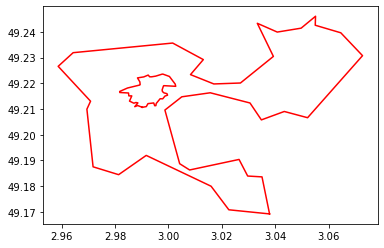

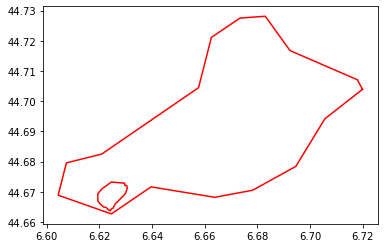

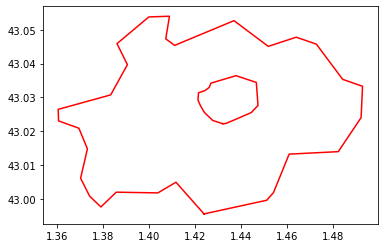

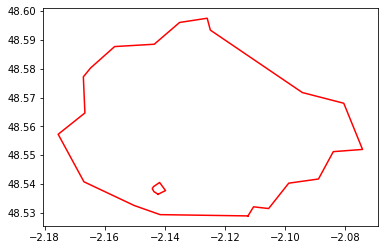

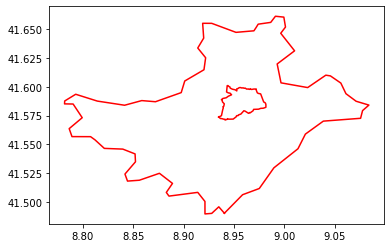

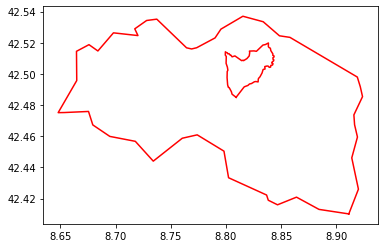

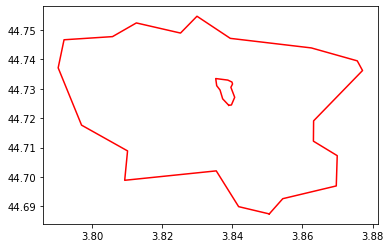

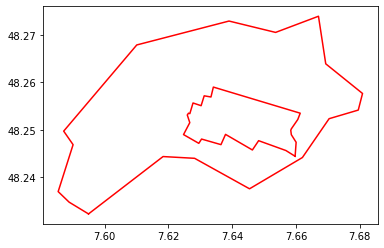

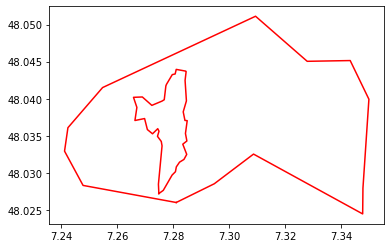

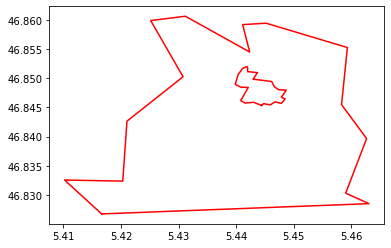

In [15]:
import matplotlib.pyplot as plt
enclaves = geo.loc[(geo['shape_type'] == 'Polygon') & (geo['shape_coordinates'].str.len() == 2), 'shape_coordinates']

for ville in enclaves:
    for i in ville:
        plt.plot(*Polygon(i).exterior.xy, color = 'red')
    plt.show()